In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import online data
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [8]:
# input variables 
digits.data.shape 
X = digits.data
# means we have 1797 picture and are of 8x8

In [9]:
# out put(Y)
digits.target.shape
y = digits.target

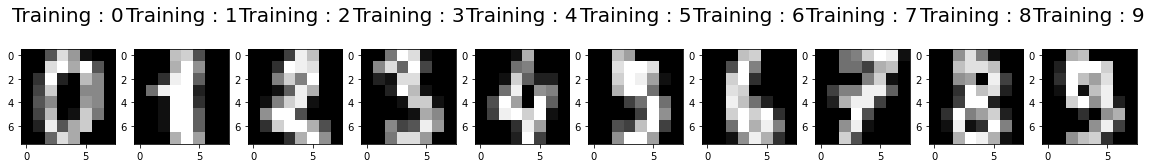

In [6]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:10],digits.target[0:10])):
    plt.subplot(1,10,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training : %i\n"% label , fontsize=20)

In [7]:
# help(plt)

In [50]:
# Split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)

In [51]:
print('Train Input Data:',X_train.shape)
print('Test Input Data:',X_test.shape)
print('Train Output Data:',y_train.shape)
print('Test Output Data:',y_test.shape)

Train Input Data: (898, 64)
Test Input Data: (899, 64)
Train Output Data: (898,)
Test Output Data: (899,)


In [52]:
# model training

from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train,y_train)
model

c:\Users\Zoraiz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# Prediction
model.predict(X_test[0:20])
predictions = model.predict(X_test)
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 9, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 5, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 9, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 2, 1, 4, 2, 1, 6, 9, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [54]:
# Accuracy Test
score = model.score(X_test,y_test)
print ('The Accuracy score is : ',score)

The Accuracy score is :  0.9543937708565072


In [55]:
# Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions)
cm

array([[ 89,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  85,   0,   0,   0,   1,   1,   0,   2,   1],
       [  0,   1,  90,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  89,   0,   1,   0,   0,   1,   2],
       [  0,   1,   0,   0,  74,   0,   0,   1,   0,   0],
       [  0,   0,   0,   1,   0, 102,   1,   1,   0,   3],
       [  0,   1,   0,   0,   0,   1,  87,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,  77,   0,   0],
       [  0,   2,   1,   1,   1,   4,   0,   0,  78,   5],
       [  0,   0,   0,   1,   0,   3,   0,   0,   1,  87]], dtype=int64)

Text(0.5, 1.0, 'Accuracy score is :0.9543937708565072')

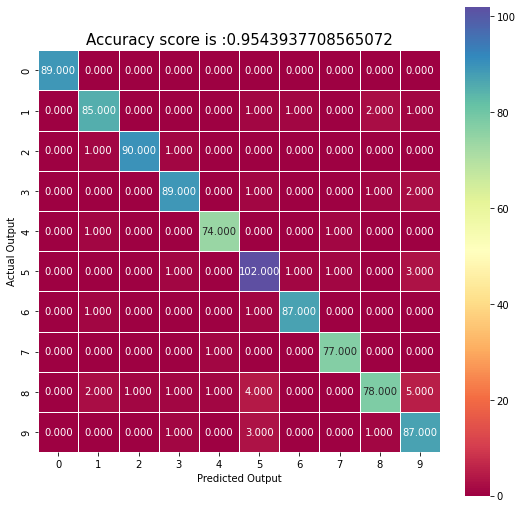

In [56]:
# Lets see in a graph
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap="Spectral")
plt.ylabel("Actual Output")
plt.xlabel("Predicted Output")
all_sample_title= 'Accuracy score is :{0}'.format(score)
plt.title(all_sample_title,size=15)

In [57]:
# getting mixedclassify label
import numpy as np
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test,predictions):
    if label!=predict:
        misclassifiedIndexes.append(index)
        index+=1

In [58]:
# # Plotting misclassified labels with known
# plt.figure(figsize=(20,4))
# for plotIndex,badIndex in enumerate(misclassifiedIndexes[0:5]):
#     plt.subplot(1,5,plotIndex+1)
#     plt.imshow(np.reshape(X_test[badIndex],(8,8)),cmap=plt.cm.gray)
#     plt.title('predicted : {}, Actual : {}'.format(predictions[badIndex],y_test[badIndex]),fontsize=15)

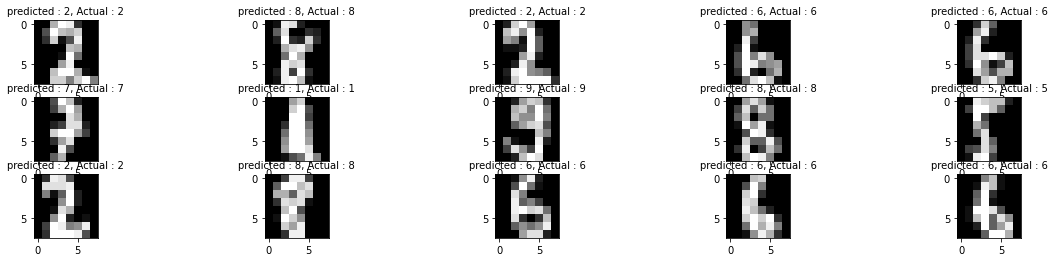

In [66]:
# Plotting misclassified labels with known
plt.figure(figsize=(20,4))
for plotIndex,badIndex in enumerate(misclassifiedIndexes[0:15]):
    plt.subplot(3,5,plotIndex+1)
    plt.imshow(np.reshape(X_test[badIndex],(8,8)),cmap=plt.cm.gray)
    plt.title('predicted : {}, Actual : {}'.format(predictions[badIndex],y_test[badIndex]),fontsize=10)